In [ ]:
!pip install pandas
!pip install numpy
!pip install matplotlib


In [ ]:
datafile = "/content/drive/My Drive/Colab Notebooks/ProjectData.xlsx"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data=pd.read_excel(datafile)
data.head()

,Customer ID,Customer Name,Customer Address,Customer City,Customer State,Customer Zip,Sales Rep
0,386423,Big Mart,56 Hanover Dr,Boston,MA,2115,gray74
1,686236,Mastro Toys,12 2nd St,New York,NY,10022,gray74
2,874239,Toy Town,350 Hazel Ave,Atlanta,GA,31324,tanderson
3,469752,Toronto Toy Land,4 Main St,Minneapolis,MN,55416,mflemming17
4,456987,UniMart,12 State St,Newark,NJ,7191,gray74


Number of rows are:  Customer ID         100
Customer Name       100
Customer Address    100
Customer City       100
Customer State      100
Customer Zip        100
Sales Rep           100
dtype: int64
Number of Columns are:  7


[]

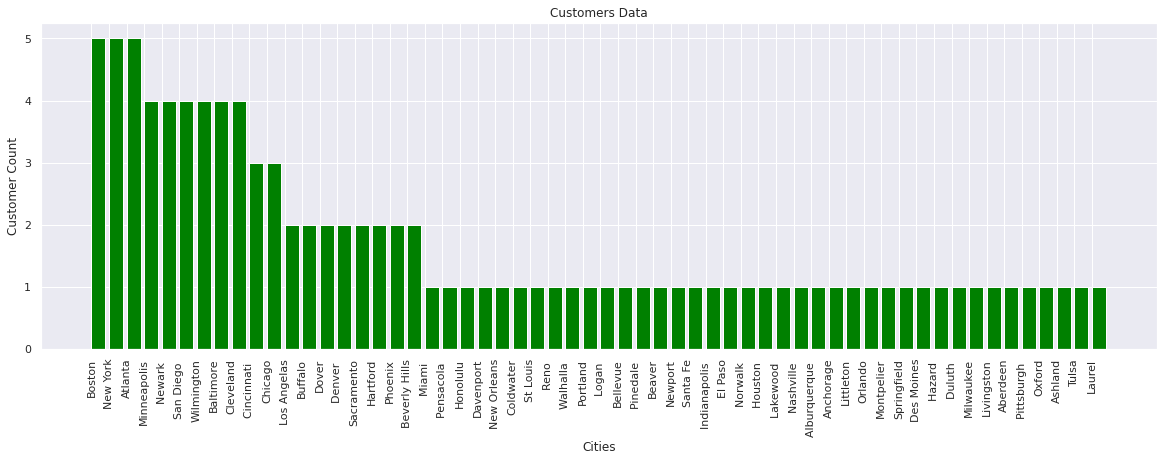

In [ ]:
#Customers Data
#Data processing 
with pd.ExcelFile(datafile) as xls:
  Customers_Data=pd.read_excel(xls,"Customer")

Customers_Data.head()

# telling its number of rows and columns,

no_rows = Customers_Data.count()
print("Number of rows are: ", no_rows)

no_cols = len(Customers_Data.columns)
print('Number of Columns are: ', no_cols)
#Data Visualization
#Cities with respect to number Customers
#print(Customers_Data["Customer City"].unique())
#print(Customers_Data["Customer City"].value_counts())
plt.figure(figsize=(20, 6))
plt.bar(Customers_Data["Customer State"].unique(),Customers_Data['Customer State'].value_counts(),align='edge',color='green')
plt.xlabel("Cities")
plt.ylabel("Customer Count")
plt.title("Customers Data")
plt.plot()





Number of rows are:  Employee ID           100
User ID               100
Employee Name         100
Hire Date             100
Termination Date        0
Work Location         100
Job Title             100
Medical Plan          100
Medical Start Date    100
Savings Plan          100
Savings Start Date    100
Approval Level          0
Salary Amount          41
Hourly Amount          59
Type                  100
Pay Frequency         100
Bonus                 100
dtype: int64
Number of Columns are:  17


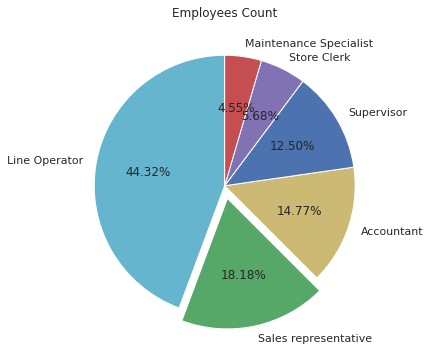

In [ ]:
#Employee
#Data processing
with pd.ExcelFile(datafile) as xls:
  emp_Data=pd.read_excel(xls,"Employee")



# telling its number of rows and columns,

no_rows = emp_Data.count()
print("Number of rows are: ", no_rows)

no_cols = len(emp_Data.columns)
print('Number of Columns are: ', no_cols)
valu=emp_Data["Job Title"].value_counts()
#data visualization
plt.figure(figsize=(40, 6))

labels = 'Line Operator', 'Sales representative', 'Accountant','Supervisor','Store Clerk','Maintenance Specialist'
sections = [valu[0],valu[1],valu[2],valu[3],valu[4],valu[5]]
colors = ['c', 'g', 'y','b','m','r']                      

plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        explode = (0, 0.1, 0,0,0,0),
        autopct = '%1.2f%%')

plt.title('Employees Count')
plt.show()

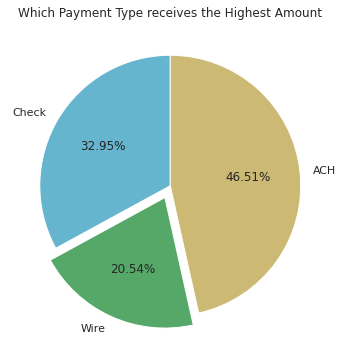

In [ ]:
#Payment
with pd.ExcelFile(datafile) as xls:
  payment_Data=pd.read_excel(xls,"Payment")
payment_Data.head()

check=payment_Data.loc[payment_Data['Payment Type'] == 'Check', 'Payment Amount'].sum()

wire=payment_Data.loc[payment_Data['Payment Type'] == 'Wire', 'Payment Amount'].sum()
Ach=payment_Data.loc[payment_Data['Payment Type'] == 'ACH', 'Payment Amount'].sum()

labels = 'Check', 'Wire', 'ACH'
sections = [check,wire,Ach]
colors = ['c', 'g', 'y']
plt.figure(figsize=(40, 6))
plt.pie(sections, labels=labels, colors=colors,
        startangle=90,
        explode = (0, 0.1, 0),
        autopct = '%1.2f%%')


plt.title('Which Payment Type receives the Highest Amount')
plt.show()



[101. 102. 103. 104. 105. 204. 211. 212. 213. 214. 215. 301. 302. 303.
 304. 305. 401. 402. 403. 404. 405.]
[21700.0, 5050.0, 5300.0, 6025.0, 4400.0, 1380.0, 17710.0, 13340.0, 13972.5, 7590.0, 24840.0, 28925.0, 24960.0, 22100.0, 4680.0, 12610.0, 5400.0, 31200.0, 9960.0, 3240.0, 16200.0]


[]

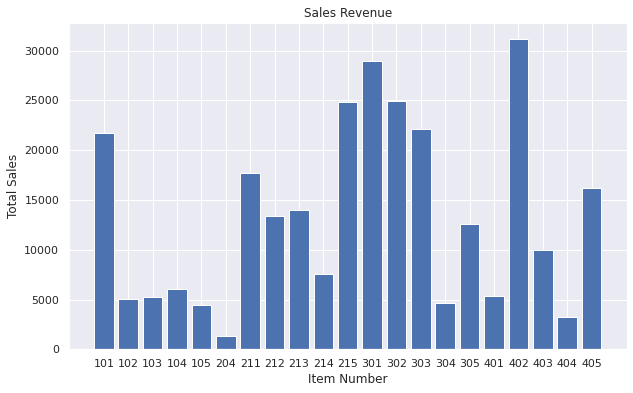

In [ ]:
with pd.ExcelFile(datafile) as xls:
  sales_Data=pd.read_excel(xls,"Sales")
sales_Data.head()
sales_Data=sales_Data.dropna()
item_no=sales_Data["Item #"].unique()
xvalues=['101', '102', '103', '104', '105', '204', '211', '212', '213', '214', '215', '301', '302', '303',
 '304', '305', '401', '402', '403', '404', '405']
revenue=[]
print(item_no)

for x in item_no:
  revenue.append(sales_Data.loc[sales_Data['Item #']== x, 'Total Price'].sum())
print(revenue)
plt.figure(figsize=(10, 6))
plt.bar(xvalues,revenue )
plt.xlabel("Item Number")
plt.ylabel("Total Sales")
plt.title("Sales Revenue")
plt.plot()





   Order ID Order Date  ...  Difference_shipped  Difference_promised
0  297449.0 2017-03-07  ...                   5                   31
1  891809.0 2017-03-07  ...                   8                   31
2  845636.0 2017-03-07  ...                  11                   31
3  562751.0 2017-03-12  ...                   7                   31
4  495177.0 2017-03-15  ...                   7                   31

[5 rows x 16 columns]


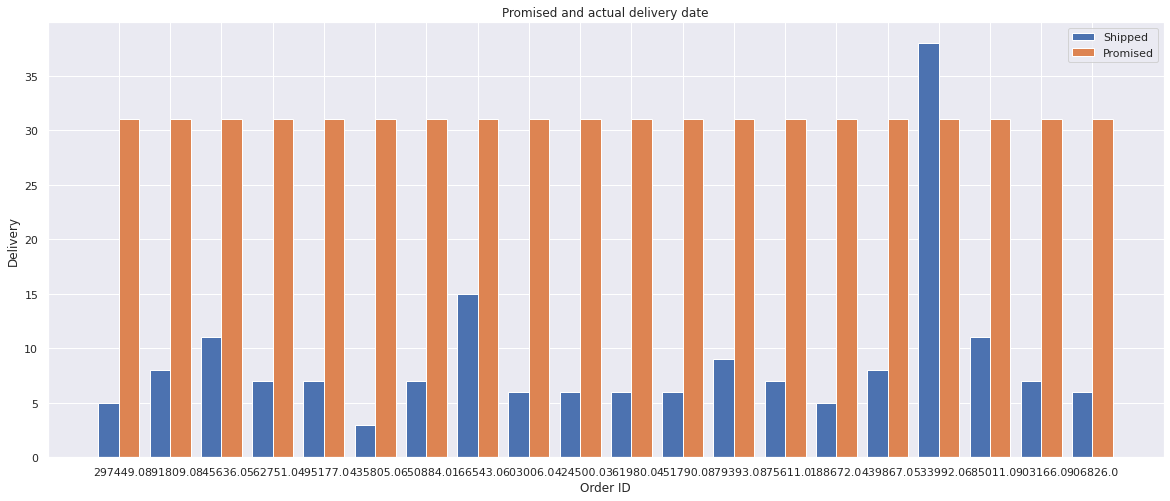

In [ ]:
with pd.ExcelFile(datafile) as xls:
  sales_Data=pd.read_excel(xls,"Sales")

sales_Data=sales_Data.dropna()
sales_Data['Difference_shipped'] = (sales_Data['Shipped Date'] - sales_Data['Order Date']).dt.days
sales_Data['Difference_promised'] = (sales_Data['Promised Date'] - sales_Data['Order Date']).dt.days
print(sales_Data.head())

plt.figure(figsize=(20, 8))
labels = sales_Data['Order ID'][0:20]
shipping_duration = sales_Data['Difference_shipped'][0:20]
promised_duration = sales_Data['Difference_promised'][0:20]
X_axis = np.arange(len(labels))
  
plt.bar(X_axis - 0.2, shipping_duration, 0.4, label = 'Shipped')
plt.bar(X_axis + 0.2, promised_duration, 0.4, label = 'Promised')
  
plt.xticks(X_axis, labels)
plt.xlabel("Order ID")
plt.ylabel("Delivery")
plt.title("Promised and actual delivery date")
plt.legend()
plt.show()


['Toy Car Wheels' 'Toy Car Doors' 'Toy Car Window' 'Toy Car Lights'
 'Doll Red Hair' 'Doll Black Hair' 'Doll Blond Hair' 'Doll Dress'
 'Doll Legs' 'Doll Arms' 'Doll Eyes' 'Doll Pants Outfit' 'Video Game Case'
 'Video Game Disk' 'Video Game Label' 'Scooter Base' 'Scooter Wheels'
 'Scooter Handlebars' 'Red Paint' 'Blue Paint' 'Yellow Paint'
 'Green Paint' 'Purple Paint' 'Black Paint' 'Pink Paint' 'Orange Paint']
[1110, 1170, 1460, 1710, 1275, 1475, 1225, 3400, 6750, 5750, 8250, 3545, 630, 690, 730, 670, 1425, 1000, 975, 950, 950, 1575, 1550, 1425, 1250, 900]


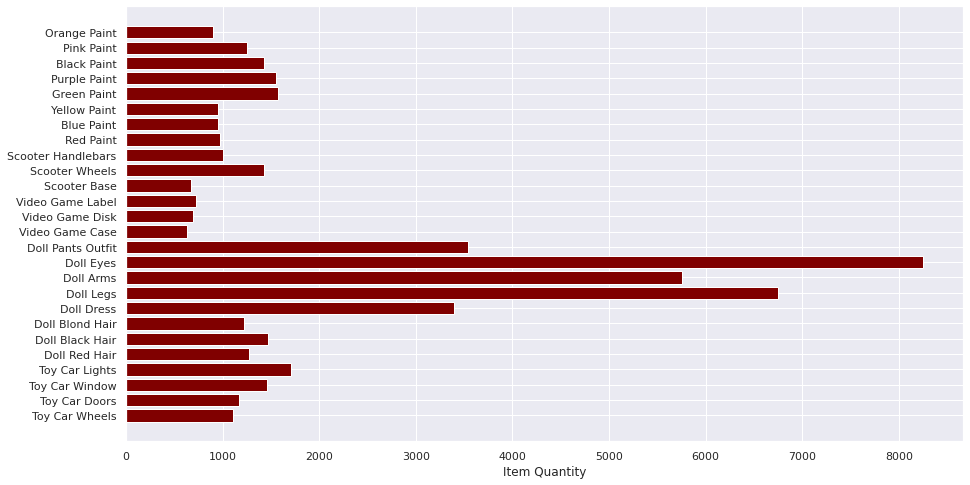

In [ ]:
#highest purchase of individual Items
with pd.ExcelFile(datafile) as xls:
  purchase_Data=pd.read_excel(xls,"Purchase Order")
good=purchase_Data['Description'].unique()
quantity=[]
for x in good:
  quantity.append(purchase_Data.loc[purchase_Data['Description']== x, 'Item Quantity'].sum())
print(good)
print(quantity)
plt.figure(figsize=(15, 8))
plt.barh(good,quantity,align='center',color='maroon')
plt.xlabel("Item Quantity")
plt.show()





In [ ]:
with pd.ExcelFile(datafile) as xls:
  payroll_Data=pd.read_excel(xls,"Payroll")
payroll_Data.head()




,Pay Type,Date of Payment,Employee ID,Employee Type,Hours Worked,Pay,Medical,Savings,Tax (10%),Year End Bonus,Total Pay
0,1st and 15th,2017-03-01,728212,Salary,NaN,2916.666667,400,58.333333,291.666667,7000.0,9166.666667
1,1st and 15th,2017-03-01,530855,Salary,NaN,5833.333333,800,233.333333,583.333333,28000.0,32216.666667
2,1st and 15th,2017-03-01,818434,Salary,NaN,3333.333333,200,166.666667,333.333333,NaN,2633.333333
3,1st and 15th,2017-03-01,411738,Salary,NaN,14583.333333,100,583.333333,1458.333333,70000.0,82441.666667
4,bi-weekly,2017-03-01,443504,Hourly,80.0,1360.000000,200,40.800000,136.000000,NaN,983.200000
